# Classification Models in sklearn

**Building Classifier Models to Predict House Prices in King County, USA**

**Goal:** The objective of this project is to build classifier models to predict a binary variable (price_gt_1M) that determines if the value of a house is greater than/equal to 1 million or less than 1 million. A requirement for this project is the use of sklearn pipelines that contain the preprocessing steps and the model estimation step

## Preliminaries

In [3]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

## Read in raw data

The data for this project can be found in `./data/kc_house_data_classification.csv`.

In [7]:
# Read csv file into panda dataframe
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

Some preliminary data prep has been completed by Prof. Mark Isken to provide the target variable in the `kc_house_data_classification.csv` file, which has been read into the `housing_df` object in this notebook. The target variable created in the data prep is `price_gt_1M` which is a binary variable:

* 1 - house price is greater than or equal to 1 million dollars
* 0 - house price is less than a million dollars

The data prep code is available in the `hw1_sklearn_dataprep.ipynb` notebook

## EDA

Introducing pandas-profiling and Sweetviz to create interactive HTML based reports. (NB: The code cells for the installation and use of pandas-profiling and Sweetviz were executed in the classic jupyter notebook)

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

### Automated EDA

<span style="color: red;">**Warning**</span>

**Running this section can slow your PC**

Open source python libraries, **Pandas Profiling** and **Sweetviz**, are used to generate reports on exploratory data analysis of the dataset

In [ ]:
# Run cell to install latest version of pandas profiling
# pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# Create Pandas Profiling report to the 'profile' object given the housing_df dataframe and title
profile = ProfileReport(housing_df, title="Pandas Profiling Report")

In [ ]:
# Save profile report to output folder
profile.to_file("output/pandas_profiling_report.html")

The EDA report from Pandas Profiling has been stored in the output folder, `output/pandas_profiling_report.html`. A similar process is used to generate a Sweetviz report

In [ ]:
# Run cell to install Sweetviz
# pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
report = sweetviz.analyze(housing_df)

In [ ]:
report.show_html("output/sweetviz_report.html")

Like the pandas_profiling_report, the sweetviz_report report has been saved to the output folder. However, to view both HTML files in this notebook, run the next 2 code cells.

In [ ]:
# Display pandas_profiling_report.html in this jupyter notebook
from IPython.display import IFrame
IFrame(src="output/pandas_profiling_report.html", width=900, height=600)

In [ ]:
#Display sweetviz_report.html in this jupyter notebook 
IFrame(src="output/sweetviz_report.html", width=900, height=600)

### Exploring the target variable

In [9]:
# To get the size of each group in the target variable
housing_df.groupby(['price_gt_1M']).size()

price_gt_1M
0    20121
1     1492
dtype: int64

In [10]:
# To get the ratio of each group in the target variable
housing_df['price_gt_1M'].value_counts(normalize=True)

0    0.930967
1    0.069033
Name: price_gt_1M, dtype: float64

### Exploring categorical & numerical variables

A list of categorical and numeric variables is required to apply the appropriate pre-processing steps in the sklearn pipelines.

In [11]:
# info on dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [12]:
# view top 5 rows in dataframe
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [13]:
# view last 5 rows in dataframe
housing_df.tail()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0
21612,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,0


All the variables are of numeric data type. However, some variables such as *bedrooms, bathrooms, floors, waterfront, view, condition, grade & zipcode* are categorical.

In [14]:
# Display the size of each group present in the categorical variables
print(housing_df.groupby(['bedrooms']).size())
print(housing_df.groupby(['bathrooms']).size())
print(housing_df.groupby(['floors']).size())
print(housing_df.groupby(['waterfront']).size())
print(housing_df.groupby(['view']).size())
print(housing_df.groupby(['condition']).size())
print(housing_df.groupby(['grade']).size())
print(housing_df.groupby(['zipcode']).size())


bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64
bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
dtype: int64
floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
dtype: int64
waterfront
0    21450
1      163
dtype: int64
view
0    19489
1      332
2      963
3      510
4      319
dtype: int64
condition
1       30
2      172
3    14031
4     5679
5     1701
dtype: int64
grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90


In [15]:
# Display the size of each group present in the categorical variables with reference to the binary values in the target variable
print(housing_df.groupby('bedrooms')['price_gt_1M'].value_counts(normalize=True))
print(housing_df.groupby('bathrooms')['price_gt_1M'].value_counts(normalize=True))
print(housing_df.groupby('floors')['price_gt_1M'].value_counts(normalize=True))
print(housing_df.groupby('waterfront')['price_gt_1M'].value_counts(normalize=True))
print(housing_df.groupby('view')['price_gt_1M'].value_counts(normalize=True))
print(housing_df.groupby('condition')['price_gt_1M'].value_counts(normalize=True))
print(housing_df.groupby('grade')['price_gt_1M'].value_counts(normalize=True))
print(housing_df.groupby('zipcode')['price_gt_1M'].value_counts(normalize=True))


bedrooms  price_gt_1M
0         0              0.846154
          1              0.153846
1         0              0.994975
          1              0.005025
2         0              0.987681
          1              0.012319
3         0              0.967834
          1              0.032166
4         0              0.891456
          1              0.108544
5         0              0.798876
          1              0.201124
6         0              0.797794
          1              0.202206
7         0              0.789474
          1              0.210526
8         0              0.692308
          1              0.307692
9         0              0.666667
          1              0.333333
10        0              0.666667
          1              0.333333
11        0              1.000000
33        0              1.000000
Name: price_gt_1M, dtype: float64
bathrooms  price_gt_1M
0.00       0              0.800000
           1              0.200000
0.50       0              1.000000


Further exploration shows the size/count of each group present in the categorical variables, and the ratio of the size of each group with reference to the target variable. A conversion of the data type of these variables is used to differentiate them from the numerical variables. 

In [16]:
# conversion to categorical data type
housing_df['bedrooms'] = housing_df['bedrooms'].astype('category')
housing_df['bathrooms'] = housing_df['bathrooms'].astype('category')
housing_df['floors'] = housing_df['floors'].astype('category')
housing_df['waterfront'] = housing_df['waterfront'].astype('category')
housing_df['view'] = housing_df['view'].astype('category')
housing_df['condition'] = housing_df['condition'].astype('category')
housing_df['grade'] = housing_df['grade'].astype('category')
housing_df['zipcode'] = housing_df['zipcode'].astype('category')

In [17]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  category
 1   bathrooms      21613 non-null  category
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  category
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  category
 7   condition      21613 non-null  category
 8   grade          21613 non-null  category
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  zipcode        21613 non-null  category
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

With the conversion of all categorical variables, an extraction of all categorical variables from a list of all the columns can provide the numeric variables.  

In [18]:
# Assign a list of all column names to the cols object
all_cols=housing_df.columns.tolist()
all_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

In [19]:
# Assign a list of all categorical column names to the categorical_cols
categorical_cols = housing_df.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

In [20]:
# To assign the numerical columns, extract all column in cols that are not in categorical_cols
numerical_cols = [c for c in all_cols if c not in categorical_cols]

# Remove target variable from numerical_col
numerical_cols.remove('price_gt_1M')
numerical_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

For data partitioning, the housing_df dataframe is divided into the target variable, y and features variables, X.

In [21]:
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]
print(X.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  category
 1   bathrooms      21613 non-null  category
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  category
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  category
 7   condition      21613 non-null  category
 8   grade          21613 non-null  category
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  zipcode        21613 non-null  category
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

**The use of assertion to ensure that no columns are missed**

In [22]:
cols = X.columns.tolist()

In [23]:
#Using assertion to check
assert len(cols) == len(categorical_cols) + len(numerical_cols), 'each col should either be in categorical or numeric lists'

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# partition our training data into train and test sets to use for model fitting and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

## Logistic Regression Models

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Pipeline**

In [27]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


### Model 0: The null model

In [29]:
print(f"Training score for the null model is: {y_train.value_counts()[0]/len(y_train):.3f}")
print(f"Test score for the null model is: {y_test.value_counts()[0]/len(y_test):.3f}")


Training score for the null model is: 0.933
Test score for the null model is: 0.924


The null model shows the accuracy of predicting 0 for all observations in both the train and test data sets.

### Model 1: Ridge regression with C=1.0

For ridge regression, the penalty in our classifier model is set to *L2*.

In [30]:
# Classifier for model 1
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

# Fit model on new training data
clf.fit(X_train, y_train)

print(f"Training score: {clf.score(X_train, y_train):.3f}")
print(f"Test score: {clf.score(X_test, y_test):.3f}")

Training score: 0.974
Test score: 0.972


With a score of 97%, the accuracy of model 1 is similar for both the train and test data sets.

To create the confusion matrices for the training and test sets, the model will be used to predict both sets, and the matrices will be created from the outcomes of the predictions and the actual y values

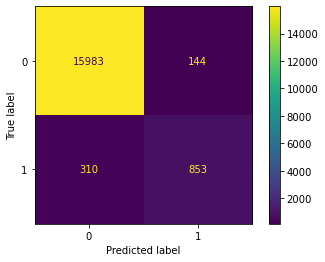

In [31]:
pred_train = clf.predict(X_train)
cm_train = confusion_matrix(y_train, pred_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp.plot()
plt.show()

The confusion matrix for model 1 on the train data set shows 15,983 true 0 values and 853 true 1 values. 310 observations with an outcome of 1 were wrongly predicted as 0 and 144 observations with an outcome of 0 were wrongly predicted as 1.

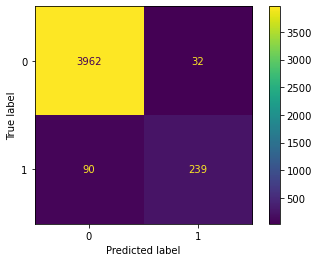

In [32]:
pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.show()

On the test data sets, there were 3,962 true 0 values and 239 true 1 values. 90 observations were wrongly predicted as 0 and 32 were wrongly predicted as 1

In [33]:
# Determining the shape of the coefficient
clf.named_steps['classifier'].coef_.shape

(1, 150)

The shape of the coefficient shows one set of coefficients. A function is created in the next code cell to plot the coefficients. This function would be used in plotting the coefficients in the other models that will be created.

In [34]:
# Function for plotting the coefficients
def coef_plot(model, title=None):
    if title:
        plt.title(title)
# Access model parameters by parameter index in the steps dict and plot    
    plt.plot(model.steps[1][1].coef_[0])
    plt.show()

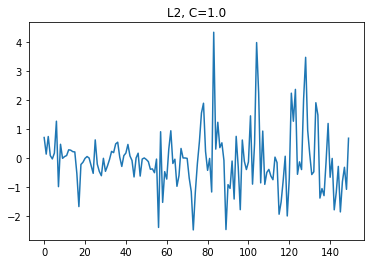

In [35]:
coef_plot(clf, 'L2, C=1.0')

The plot of the coefficients shows variations in the magnitude and direction of the model coefficients.

### Model 2: Lasso regression with C=1.0

For lasso regression, the penalty in our classifier model is set to *L1*.

In [36]:
# Classifier for model 2
clf_lasmodel_C1 = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline
clf_l1_C1 = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', clf_lasmodel_C1)])

# Fit model on training data
clf_l1_C1.fit(X_train, y_train)

print("Training score: %.3f" % clf_l1_C1.score(X_train, y_train))
print("Test score: %.3f" % clf_l1_C1.score(X_test, y_test))

Training score: 0.974
Test score: 0.970


With a score of 97%, the accuracy of model 2 is similar for both the train and test data sets.

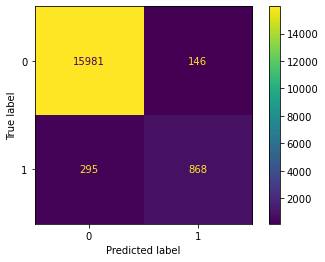

In [37]:
pred_train_M2 = clf_l1_C1.predict(X_train)
cm_train_M2 = confusion_matrix(y_train, pred_train_M2, labels=clf_l1_C1.classes_)
disp_trainM2 = ConfusionMatrixDisplay(confusion_matrix=cm_train_M2, display_labels=clf_l1_C1.classes_)
disp_trainM2.plot()
plt.show()

The confusion matrix for model 2 on the train data set shows 15,981 true 0 values and 868 true 1 values. 295 observations with an outcome of 1 were wrongly predicted as 0 and 146 observations with an outcome of 0 were wrongly predicted as 1.

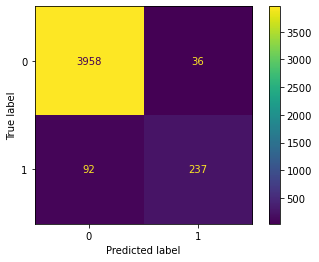

In [38]:
pred_test_M2 = clf_l1_C1.predict(X_test)
cm_test_M2 = confusion_matrix(y_test, pred_test_M2, labels=clf_l1_C1.classes_)
disp_testM2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_M2, display_labels=clf_l1_C1.classes_)
disp_testM2.plot()
plt.show()

On the test data sets, there were 3,958 true 0 values and 237 true 1 values. 92 observations were wrongly predicted as 0 and 36 were wrongly predicted as 1

In [39]:
clf_l1_C1.named_steps['classifier'].coef_.shape

(1, 150)

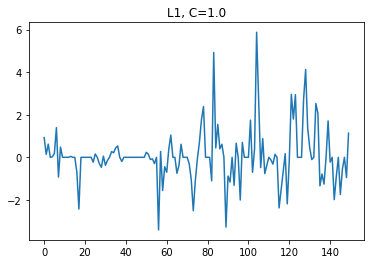

In [40]:
coef_plot(clf_l1_C1, 'L1, C=1.0')

Similar to model 1 (ridge regression), the plot of the coefficients shows variations in the magnitude and direction of the model coefficients. However, the plot shows zero values for some of the model coefficients due to lesser weight on the penalty function for the lasso regression as compared to the ridge regression

### Model 3: Lasso regression with C=0.01

In [41]:
# Classifier for model3
clf_lasmodel_C01 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline
clf_l1_C01 = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', clf_lasmodel_C01)])

# Fit model on training data
clf_l1_C01.fit(X_train, y_train)

print("Training score: %.3f" % clf_l1_C01.score(X_train, y_train))
print("Test score: %.3f" % clf_l1_C01.score(X_test, y_test))

Training score: 0.954
Test score: 0.950


C:\Users\Students\anaconda3\envs\aap\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


with a *C* value of 0.01, more regulaization is enforced. A score of 95% is achieved for both the train and test data sets.

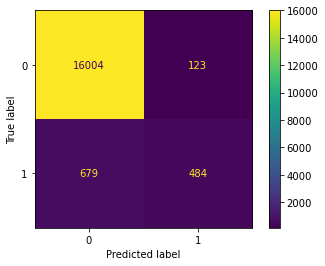

In [42]:
pred_train_M3 = clf_l1_C01.predict(X_train)
cm_train_M3 = confusion_matrix(y_train, pred_train_M3, labels=clf_l1_C01.classes_)
disp_trainM3 = ConfusionMatrixDisplay(confusion_matrix=cm_train_M3, display_labels=clf_l1_C01.classes_)
disp_trainM3.plot()
plt.show()

The confusion matrix for model 3 on the train data set shows 16,004 true 0 values and 484 true 1 values. 679 observations with an outcome of 1 were wrongly predicted as 0 and 123 observations with an outcome of 0 were wrongly predicted as 1.

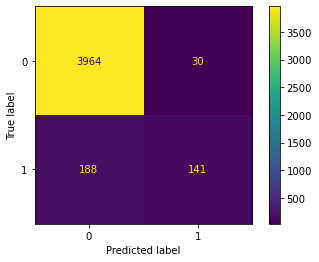

In [43]:
pred_test_M3 = clf_l1_C01.predict(X_test)
cm_test_M3 = confusion_matrix(y_test, pred_test_M3, labels=clf_l1_C01.classes_)
disp_testM3 = ConfusionMatrixDisplay(confusion_matrix=cm_test_M3, display_labels=clf_l1_C01.classes_)
disp_testM3.plot()
plt.show()

On the test data sets, there were 3,964 true 0 values and 141 true 1 values. 188 observations were wrongly predicted as 0 and 30 were wrongly predicted as 1

In [44]:
clf_l1_C01.named_steps['classifier'].coef_.shape

(1, 150)

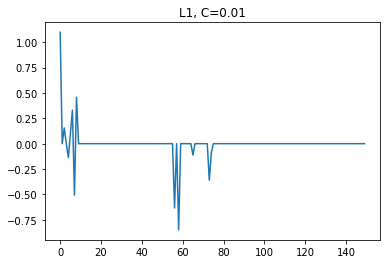

In [45]:
coef_plot(clf_l1_C01, 'L1, C=0.01')

With a *C* value < 1, there is more regularization, and reduction of the fit coefficients towards 0. The is also depicted in the plot. 

### Model 4: Lasso Regression with optimal C value

In [46]:
# Classifier for model 4
clf_lasmodel_CV = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', max_iter=5000)

# Append classifier to preprocessing pipeline
clf_l1_CV = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', clf_lasmodel_CV)])

# Fit model on training data
clf_l1_CV.fit(X_train, y_train)

print("Training score: %.3f" % clf_l1_CV.score(X_train, y_train))
print("Test score: %.3f" % clf_l1_CV.score(X_test, y_test))


C:\Users\Students\anaconda3\envs\aap\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Training score: 0.975
Test score: 0.971


For model 4, the Cs has been set to 10 (which is the default). This provides a grid of C values (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html" target="_blank">LogisticRegressionCV</a>). Cs was also set to 5, and there was no much difference in the model results, however, it solves faster. max_iter has been set to 5000 to enable convergence as the model solves with different values of C. A lower value of max_iter gives a similar result, and the model solves faster. However, it shows a lot of convergence warnings as it solves with the different hyperparameters

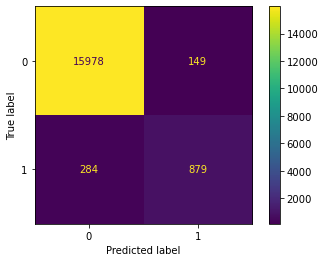

In [47]:
pred_train_M4 = clf_l1_CV.predict(X_train)
cm_train_M4 = confusion_matrix(y_train, pred_train_M4, labels=clf_l1_CV.classes_)
disp_trainM4 = ConfusionMatrixDisplay(confusion_matrix=cm_train_M4, display_labels=clf_l1_CV.classes_)
disp_trainM4.plot()
plt.show()

The confusion matrix for model 4 on the train data set shows 15,978 true 0 values and 879 true 1 values. 284 observations with an outcome of 1 were wrongly predicted as 0 and 149 observations with an outcome of 0 were wrongly predicted as 1.

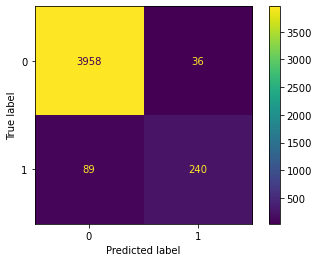

In [48]:
pred_test_M4 = clf_l1_CV.predict(X_test)
cm_test_M4 = confusion_matrix(y_test, pred_test_M4, labels=clf_l1_CV.classes_)
disp_testM4 = ConfusionMatrixDisplay(confusion_matrix=cm_test_M4, display_labels=clf_l1_CV.classes_)
disp_testM4.plot()
plt.show()

On the test data sets, there were 3,958 true 0 values and 240 true 1 values. 89 observations were wrongly predicted as 0 and 36 were wrongly predicted as 1

In [49]:
clf_l1_CV.named_steps['classifier'].coef_.shape

(1, 150)

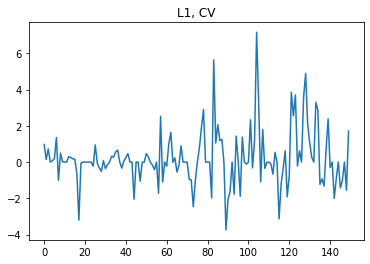

In [50]:
coef_plot(clf_l1_CV, 'L1, CV')

From the plot, it can be determined that there is less regularization in model 4. We can determine the C values used in this model to examine the influence of regularization on this model

In [51]:
# Access model parameters by parameter name in the named_steps dict 
print(f"C values: {clf_l1_CV.named_steps['classifier'].Cs_}")

C values: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


In [52]:
print("Optimal value of C: %.3f" % clf_l1_CV.named_steps['classifier'].C_)

Optimal value of C: 2.783


The optimal value of C used in this model is 2.783, which is greater that 1. There is less regularization in this model

### Random forest model

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Random forest classifier
clf_rf_class = RandomForestClassifier(oob_score=True, random_state=0)

# Append classifier to preprocessing pipeline
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', clf_rf_class)])

# Fit model on training data
clf_rf.fit(X_train, y_train)
print("Random forest model score: %.3f" % clf_rf.score(X_train, y_train))
print("Random forest model score: %.3f" % clf_rf.score(X_test, y_test))

Random forest model score: 1.000
Random forest model score: 0.969


The random forest model scores 100% accuracy on the training data, and 96.9% accuracy on the test data

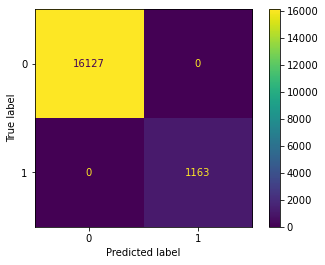

In [55]:
pred_train_rf = clf_rf.predict(X_train)
cm_train_rf = confusion_matrix(y_train, pred_train_rf, labels=clf_rf.classes_)
disp_train_rf = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=clf_rf.classes_)
disp_train_rf.plot()
plt.show()

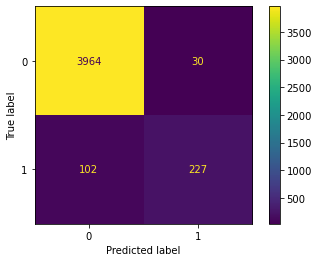

In [56]:
pred_test_rf = clf_rf.predict(X_test)
cm_test_rf = confusion_matrix(y_test, pred_test_rf, labels=clf_rf.classes_)
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=clf_rf.classes_)
disp_test_rf.plot()
plt.show()

There will be no coefficient plot for a random forest model because random forests have no coefficients. Instead, random forests fit multiple decision trees on various sub-samples of the datasets (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">RandomForestClassifier</a>)

## A little error exploration

In [57]:
# Read csv file with price
housing_reg_df = pd.read_csv("./data/kc_house_data_regression.csv")

In [58]:
housing_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  price          21613 non-null  float64
dtypes: flo

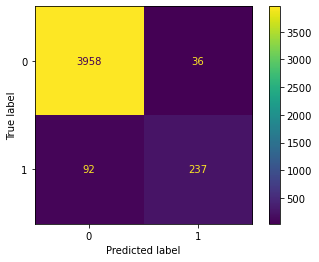

In [59]:
# Display confusion matrix for model 2
disp_testM2.plot()
plt.show()

From the confusion matrix, we can determine the total number of wrong predictions as 128. To find the corresponding price values for these wrong predictions, a join of the test, predicted and price arrays is required. To enable this, a conversion of these arrays to panda's data frames is required.

In [60]:
# Convert test array to panda data frame
test_array = pd.DataFrame(y_test)
test_array

,price_gt_1M
13473,0
9626,0
21376,0
9036,0
1007,0
...,...
662,0
16297,0
1390,0
3546,0


Unlike y_test, the predicted test values do not have indices, which is required to join both data frames. We can assigned the indices for the test array to the predicted array.

In [61]:
# Convert array of predicted test values of model 2 to panda's data frame
pred_array = pd.DataFrame(pred_test_M2, index=test_array.index)

# Rename column
pred_array.rename(columns = {0: 'Predicted'}, inplace=True)
pred_array

,Predicted
13473,0
9626,0
21376,0
9036,0
1007,0
...,...
662,0
16297,0
1390,0
3546,0


In [62]:
# Assign price to a panda's df
price_array = pd.DataFrame(housing_reg_df.iloc[:,17])
price_array

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [63]:
# Join predicted and test df
pred_test_join = test_array.merge(pred_array, how='inner', left_index=True, right_index=True)
pred_test_join

,price_gt_1M,Predicted
13473,0,0
9626,0,0
21376,0,0
9036,0,0
1007,0,0
...,...,...
662,0,0
16297,0,0
1390,0,0
3546,0,0


In [64]:
# Join price df to predicted and test df
pred_test_price = pred_test_join.merge(price_array, how='inner', left_index=True, right_index=True)
pred_test_price

,price_gt_1M,Predicted,price
13473,0,0,257000.0
9626,0,0,201000.0
21376,0,0,365000.0
9036,0,0,667000.0
1007,0,0,325000.0
...,...,...,...
662,0,0,475000.0
16297,0,0,615000.0
1390,0,0,651000.0
3546,0,0,436000.0


With a data frame containing test and predicted values with the price, wrong predictions can be determined by finding observations where predicted is not equal to test

In [65]:
# Price values for all predictions not equal to test(price_gt_1M)
price_false_pred = pred_test_price.loc[pred_test_price['price_gt_1M'] != pred_test_price['Predicted']]
price_false_pred

,price_gt_1M,Predicted,price
4937,1,0,1400000.0
16888,0,1,995000.0
12591,1,0,1075000.0
11947,1,0,1150000.0
11421,1,0,1017000.0
...,...,...,...
1807,0,1,930000.0
9278,0,1,780000.0
8539,1,0,1208000.0
4892,0,1,952000.0


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

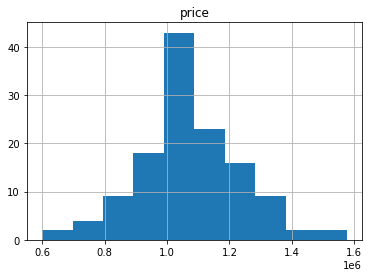

In [66]:
# Plot Histogram
price_false_pred.hist(column = 'price')

From the histogram, it can be determined that most of the wrong predictions for model 2 are for values greater than 1 million.